

*  Name : Sara Abdelsalam
*  Track : Data Science & Bussiness Analytics
*  Task 3 : Exploratory Data Analysis - Ratail 





In [1]:
# importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing the dataset
data = pd.read_csv('SampleSuperstore.csv')
df_store = pd.DataFrame(data)
#view the data
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
#Basic information

df_store.info()
print("_________________________________________________________________________")
#Describe the data

df_store.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
_________________________________________________________________________


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
#Find the duplicates

df_store.duplicated().sum()
# drop the duplicates
df_store.drop_duplicates(inplace=True)
print(df_store.shape)

(9977, 13)


In [4]:
# check unique values in each column
print(df_store.columns)
df_store.nunique()

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [5]:
#remove unnessecary columns
df_store=df_store.drop(['Country','Postal Code','Discount'],axis=1)
df_store.describe()


,Sales,Quantity,Profit
count,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,28.69013
std,623.721409,2.226657,234.45784
min,0.444000,1.000000,-6599.97800
25%,17.300000,2.000000,1.72620
50%,54.816000,3.000000,8.67100
75%,209.970000,5.000000,29.37200
max,22638.480000,14.000000,8399.97600


Dropping columns - Postal Code, Discount and Country, as the country for the whole dataset is US , so these are the fields which do not contribute much to detect the profit, sales.

In [6]:
df_store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,2.5164


In [7]:
#Grouping the data Region-wise, State-Wise, Segment-Wise, Categry-wise and ShipMode-wise.
category_group = df_store.groupby(['Category','Sub-Category'])['Sales','Quantity','Profit'].mean().reset_index()
segment_group = df_store.groupby(['Segment'])['Sales','Quantity','Profit'].mean().reset_index()
region_group =df_store.groupby(['Region'])['Sales','Quantity','Profit'].mean().reset_index()
state_group = df_store.groupby(['State'])['Sales','Quantity','Profit'].mean().reset_index()
shipmode_group = df_store.groupby(['Ship Mode'])['Sales','Quantity','Profit'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (impli

In [8]:
# EDA_Region wise
region_group.head(10)

,Region,Sales,Quantity,Profit
0,Central,215.947759,3.780940,17.100421
1,East,238.465798,3.728998,32.163905
2,South,241.803645,3.832716,28.857673
3,West,227.139254,3.831506,33.927281


<Figure size 1008x504 with 0 Axes>

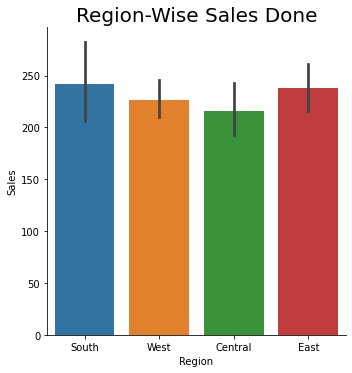

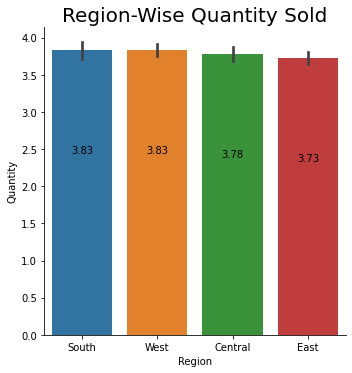

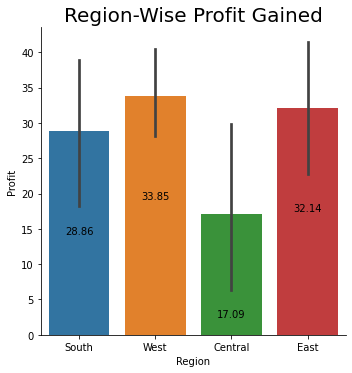

In [37]:
fig = plt.figure(figsize=(14,7))
first = sns.catplot(x='Region',
                y='Sales',
                data=data,
                kind='bar')
for ax in first.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Sales Done", fontsize=20)

sec = sns.catplot(x='Region',
                y='Quantity',
                data=data,
                kind='bar')
for ax in sec.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Quantity Sold", fontsize=20)

third = sns.catplot(x='Region',
                y='Profit',
                data=data,
                kind='bar')
for ax in third.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Region-Wise Profit Gained", fontsize=20)
plt.show()

From these graphs, we can conclude that

* Sales are more in Southern and Eastern part of US.
* Quantity of products sold in all the regions are almost same and not much of difference.
* Profit gained in Western part of US is comparatively higher followed by Eastern part, Southern part then Central part of US.

In [11]:
#State wise data analysis
print(state_group)


                   State        Sales  Quantity      Profit
0                Alabama   319.846557  4.196721   94.865989
1                Arizona   157.508933  3.848214  -15.303235
2               Arkansas   194.635500  4.000000   66.811452
3             California   229.246629  3.832164   38.241878
4               Colorado   176.418231  3.807692  -35.867351
5            Connecticut   163.223866  3.426829   42.823071
6               Delaware   285.948635  3.822917  103.930988
7   District of Columbia   286.502000  4.000000  105.958930
8                Florida   233.612815  3.600522   -8.875461
9                Georgia   266.825217  3.831522   88.315453
10                 Idaho   208.689810  3.047619   39.367767
11              Illinois   163.263823  3.751527  -25.665275
12               Indiana   359.431946  3.879195  123.375411
13                  Iowa   152.658667  3.733333   39.460397
14                Kansas   121.429583  3.083333   34.851813
15              Kentucky   263.250000  3

In [25]:
#sort the values
sorted_sales = state_group.sort_values(['Sales'], 
                                        ascending=False)[:10]
sorted_quantity = state_group.sort_values(['Quantity'], 
                                        ascending=False)[:10]
sorted_profit = state_group.sort_values(['Profit'], 
                                        ascending=False)[:10]

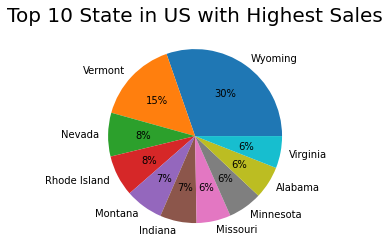

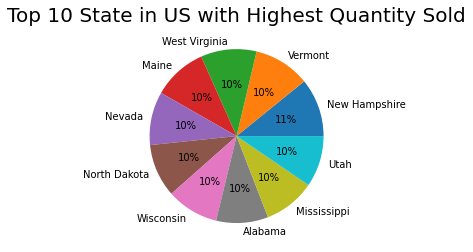

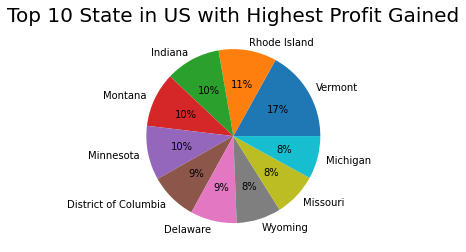

In [26]:
sales_values = sorted_sales.Sales
quantity_values = sorted_quantity.Quantity
profit_values = sorted_profit.Profit

sales_labels = sorted_sales.State
quantity_labels = sorted_quantity.State
profit_labels = sorted_profit.State

plt.pie(sales_values, labels=sales_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Sales", fontsize=20)
plt.show()

plt.pie(quantity_values, labels=quantity_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Quantity Sold", fontsize=20)
plt.show()

plt.pie(profit_values, labels=profit_labels, autopct='%1.f%%')
plt.title("Top 10 State in US with Highest Profit Gained", fontsize=20)
plt.show()


* From these graphs, we can conclude that

* Wyoming sales are highest among all but with a profit of only 8%.
* Almost all top 10 states have same quantity sold
* Vermont State gained the highest profit among all.
* Wyoming has the the highest sales also hasn't gained the highest profit

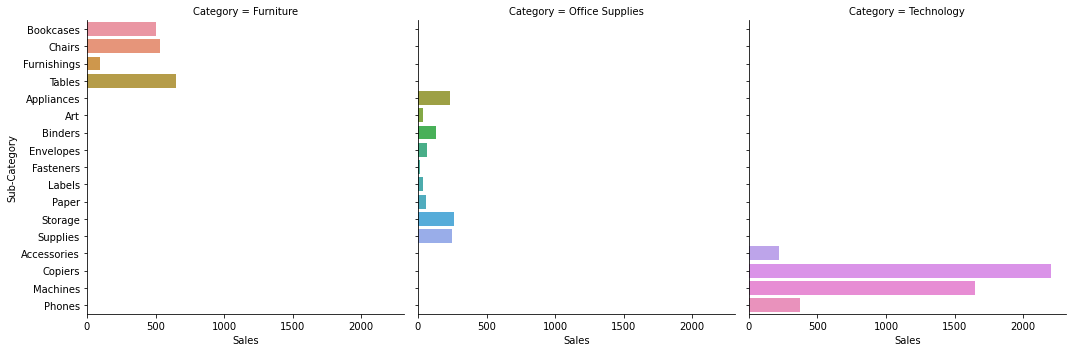

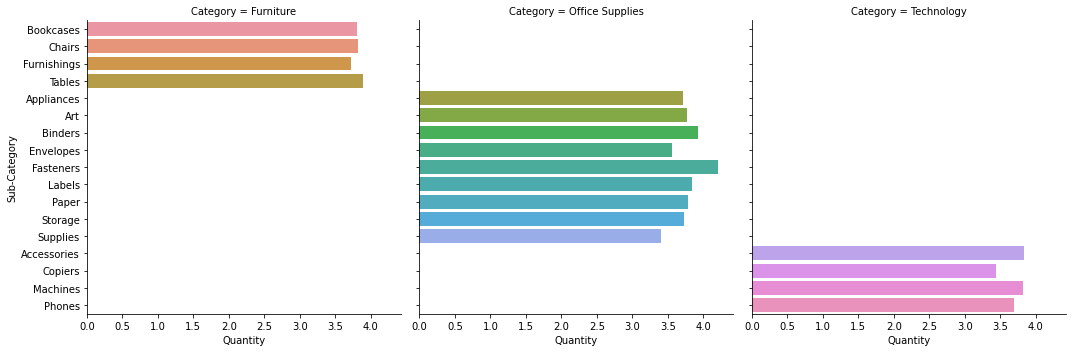

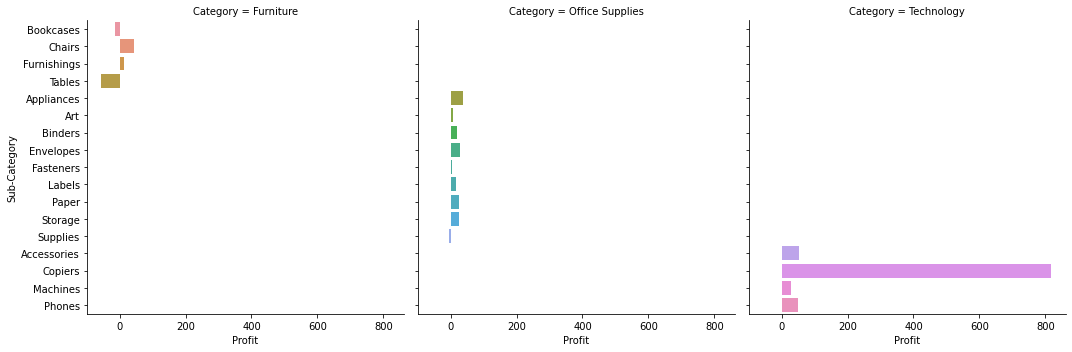

In [27]:
#data analysis category wise
x = sns.catplot(x="Sales", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

y = sns.catplot(x="Quantity", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')

z = sns.catplot(x="Profit", 
                y="Sub-Category",
                col="Category",
                data=category_group,
                kind='bar')


From these graphs, we can conclude that
* Technology category sales are higher than the two other categories
* the sub-categories copiers and machines in the technology category have the highest sales
* Sold Quantities in each category are almost equal
* In Furniture Category bookcases and tables are incurring a lose
* In Office Supplies category, there is a very minimal profit in all sub-categories.
* In technology category, Copiers provide the highest profit 

Text(0.5, 1.0, 'Segment-Wise Profit Gained')

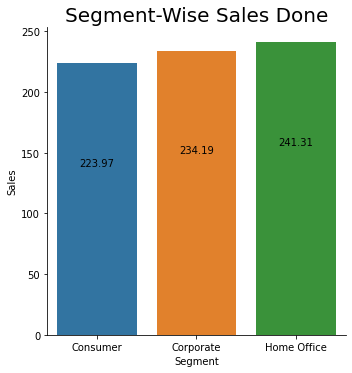

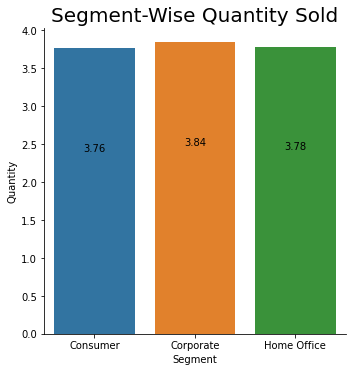

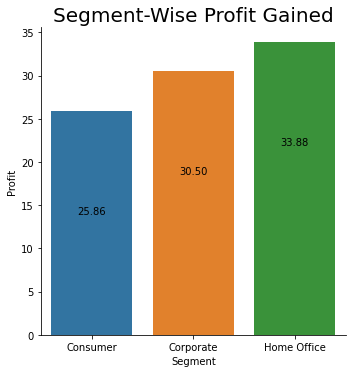

In [28]:
x = sns.catplot(x="Segment", y="Sales", data=segment_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Segment", y="Quantity", data=segment_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Segment", y="Profit", data=segment_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Segment-Wise Profit Gained", fontsize=20)

we can conclude from these graphs
* sales are almost equal in each segment
* sold quantities are almost equal in each segment
* Home Office Segment has the highest sales and the highest profit gained

In [29]:
shipmode_group

,Ship Mode,Sales,Quantity,Profit
0,First Class,228.614490,3.702017,31.850134
1,Same Day,236.755950,3.608856,29.283924
2,Second Class,236.323750,3.817808,29.565956
3,Standard Class,227.928858,3.821327,27.534715


Text(0.5, 1.0, 'Shop Mode-Wise Profit Gained')

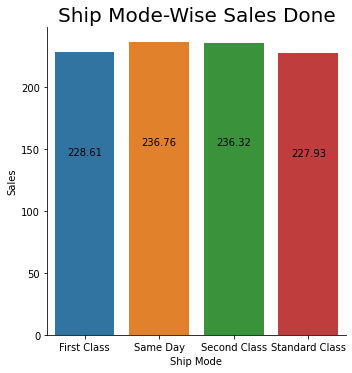

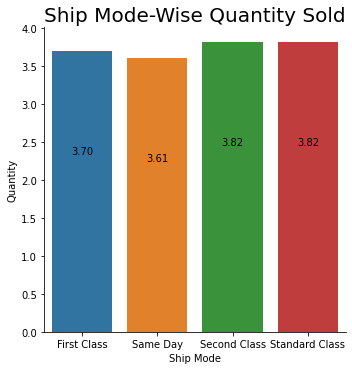

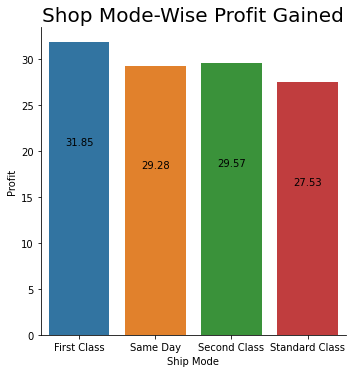

In [36]:
x = sns.catplot(x="Ship Mode", y="Sales", data=shipmode_group, kind='bar')
for ax in x.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Sales Done", fontsize=20)

y = sns.catplot(x="Ship Mode", y="Quantity", data=shipmode_group, kind='bar')
for ax in y.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Ship Mode-Wise Quantity Sold", fontsize=20)

z = sns.catplot(x="Ship Mode", y="Profit", data=shipmode_group, kind='bar')
for ax in z.axes.ravel():
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, -100), 
                textcoords = 'offset points')
plt.title("Shop Mode-Wise Profit Gained", fontsize=20)

 from these graphs we can conclude that 
 * ship mode doesn't affect the Profit, Sales and Quantity. All types of Ship Mode show the almost same values

From all the Exploratory Data Analysis done above, we can conclude  that

* Technology Category are in demand. So if production in this field will be more, then company can get more profit.
* Profit gain is highest in Home-Office segment. Company must emphasise more to Home-Office segment.
* People in the South and East prefer most of the goods. Company must spread out their products in these part of US.
* Profit are highest in Western part of US. Company should produce more in this part of US but must come with a plan to increase the sales.
* Wyoming State have highest sales and Vermont State have the highest Profit. Company must place all types of products in these states for more profit and sales.